IN THIS NOTEBOOK WE WILL LOOK AT HOW WE CAN APPLY POWER TRANSFORMER 
THERE ARE 2 METHODS TO PERFORM

* BOX FOX 
* YEO JOHNSON

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("concrete_data.csv")

In [7]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [12]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
x = df.drop(columns =["Strength"])
y =df["Strength"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =42)

##### APPLYING REGRESSION WITHOUT ANY TRANFORMATION

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)
r2_score(y_test,y_pred)

0.627553179231485

# CROSS CHECKING WITH CROSS VAL SCORE

In [26]:
lr = LinearRegression()

In [27]:
np.mean(cross_val_score(lr,x,y,scoring="r2"))

0.4609940491662866

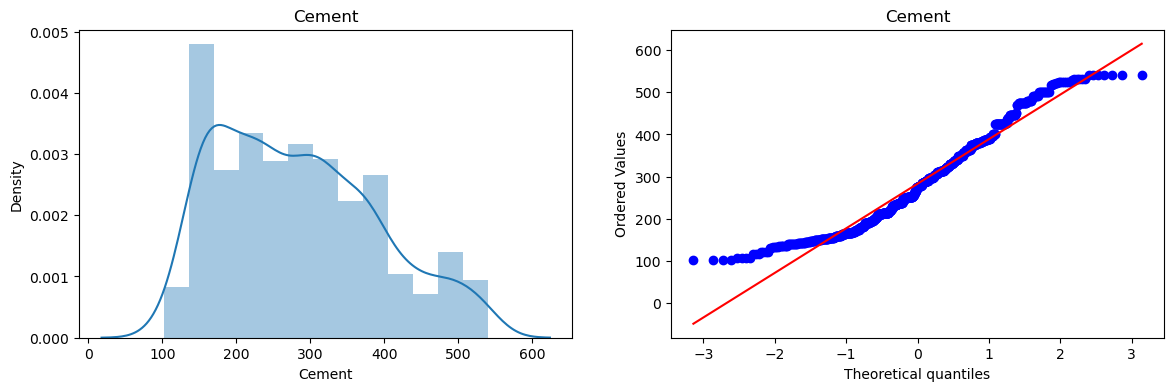

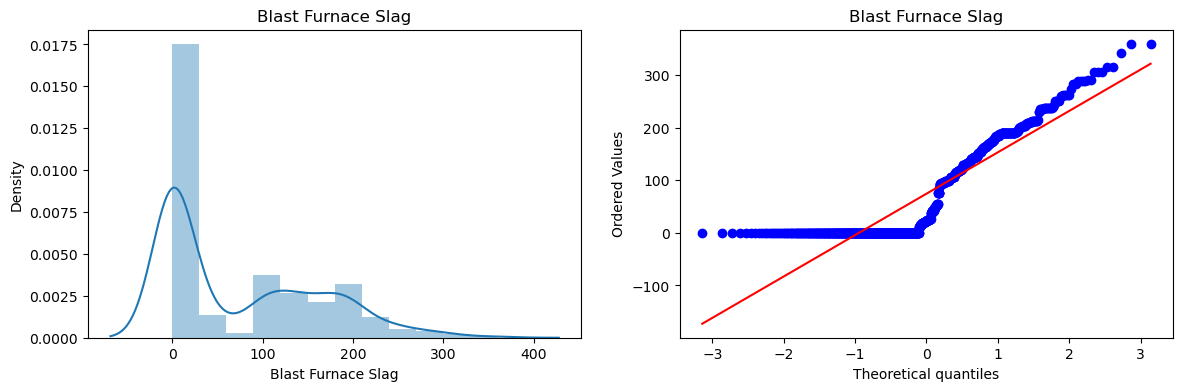

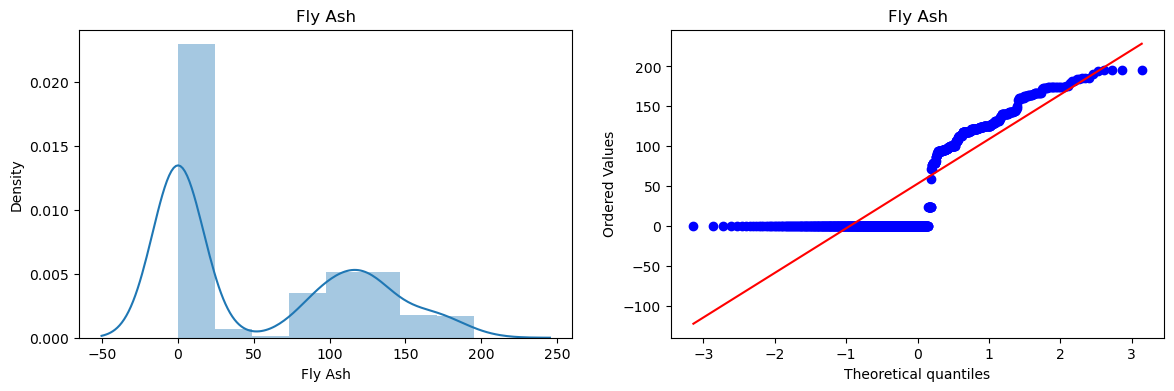

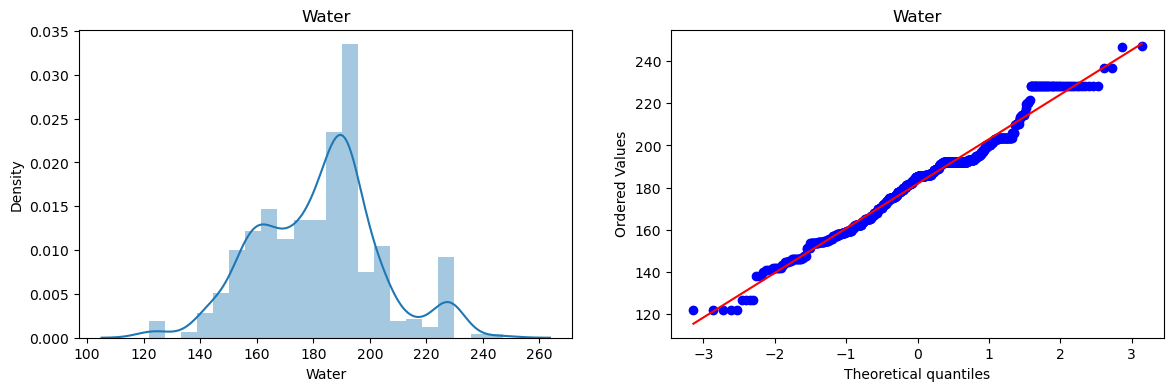

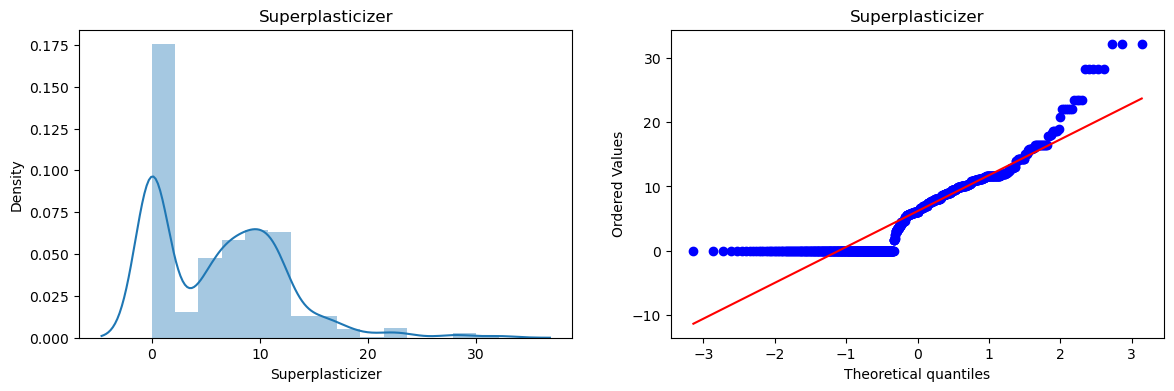

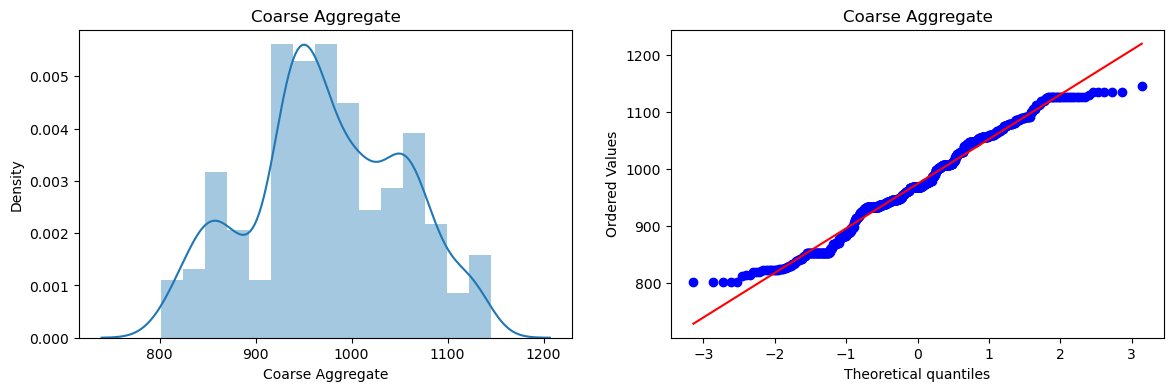

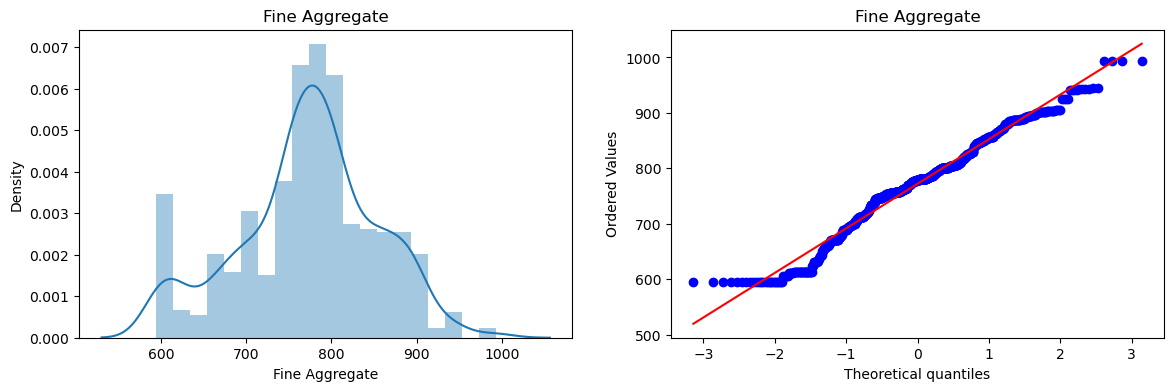

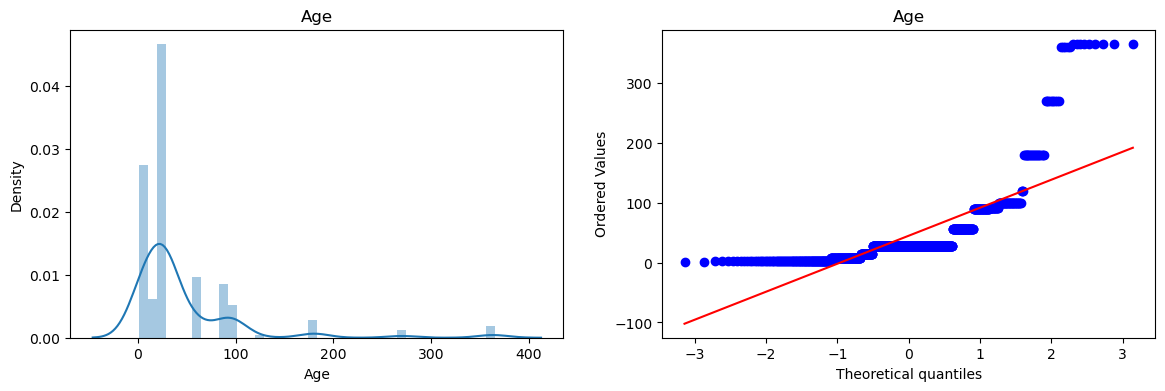

In [38]:
# PLOTTING THE DISTPLOTS WITHOUT ANY TRANFORMATION

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist = "norm", plot = plt)
    plt.title(col)
    

## APPLYING THE BOX COX TRANSFORMATION

In [48]:
pt = PowerTransformer(method = "box-cox")
x_train_trans = pt.fit_transform(x_train+0.00001)
x_test_trans = pt.transform(x_test+0.000001)

pd.DataFrame({"cols":x_train.columns, "box_cox_lambda" : pt.lambdas_})

,cols,box_cox_lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


array([ 0.17702533,  0.02784218, -0.04455395,  0.77268151,  0.11389156,
        1.12981306,  1.7820182 ,  0.06663045])

## APPLYING LINEAR REGRESSION ON TRANSFORMED DATA 

In [51]:
lr = LinearRegression()
lr.fit(x_train_trans, y_train)

y_pred2= lr.predict(x_test_trans)
r2_score(y_test,y_pred2)

0.7987283130375379

In [58]:
## using cross validation score
pt = PowerTransformer(method = "box-cox")
x_transformed = pt.fit_transform(x+0.0000001)

np.mean(cross_val_score(lr,x_transformed,y,scoring = "r2"))

0.6658537942219862

### BEFORE AND AFTER COMPARISION FOR BOX-COX PLOT

In [65]:
x_transformed
for col in x_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'